In [42]:
%pylab inline
import json
import os
import glob
import fitsne

from sklearn.decomposition import PCA, FastICA
from skimage.color import rgb2gray
from skimage.io import imread
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
import umap

import seaborn as sns

js = json.load(open('/Z/personal-folders/interns/saket/github/pix-plot-mine/output/plot_data.json'))

Populating the interactive namespace from numpy and matplotlib


/home/saket/anaconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['imread']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [5]:
normal_patches_dir = '/Z/personal-folders/interns/saket/histopath_data/CAMELYON16_patches/normal_patches_test/level_0/'
tumor_patches_dir = '/Z/personal-folders/interns/saket/histopath_data/CAMELYON16_patches/tumor_patches_test/level_0/'

In [6]:
list_of_tumor_files = list(glob.glob('{}*.png'.format(tumor_patches_dir), ))
list_of_normal_files = list(glob.glob('{}*.png'.format(normal_patches_dir)))


In [8]:
tumor_filenames = [os.path.basename(path) for path in list_of_tumor_files]
normal_filenames = [os.path.basename(path) for path in list_of_normal_files]

In [11]:
js['centroids'][0]['img'].replace('.jpg', '.png') in normal_filenames

True

Cluster1 is normal!

In [12]:
js['centroids'][1]['img'].replace('.jpg', '.png') in normal_filenames

False

Cluster2 is tumor!

In [24]:
'tumor_008_4579_131001_256.png' in normal_filenames

False

In [26]:
'tumor_097_46608_20161_256.png' in normal_filenames

False

In [18]:
js['centroids']
#[0]

[{'img': 'tumor_094_42816_57152_256.jpg', 'label': 'Cluster 1'},
 {'img': 'tumor_040_37142_141610_256.jpg', 'label': 'Cluster 2'}]

In [22]:
for index, position in enumerate(js['positions']):
    if position[0] == js['centroids'][0]['img'].replace('.jpg', ''):
        print(index, position)
    

9334 ['tumor_094_42816_57152_256', 272, 60, 32, 32]


In [23]:
for index, position in enumerate(js['positions']):
    if position[0] == js['centroids'][1]['img'].replace('.jpg', ''):
        print(index, position)
    

26170 ['tumor_040_37142_141610_256', -300, -67, 32, 32]


# Load vectors

In [30]:
y = []
X = []
for f in glob.glob('/Z/personal-folders/interns/saket/github/pix-plot-mine/output/image_vectors/*.npy'):
    vector = np.load(f)
    X.append(vector)
    f = os.path.basename(f)
    if f.replace('.jpg.npy', '.png') in normal_filenames:
        y.append('normal')
    elif f.replace('.jpg.npy', '.png') in tumor_filenames:
        y.append('tumor')
    else:
        raise RuntimeError('Nothing found for {}'.format(f))

In [31]:
X = np.asarray(X)

In [33]:
labels = [0 if x=='normal' else 1 for x in y]
labels = np.asarray(labels)

In [36]:
Y = fitsne.FItSNE(X.astype(float))# max_iter=500)

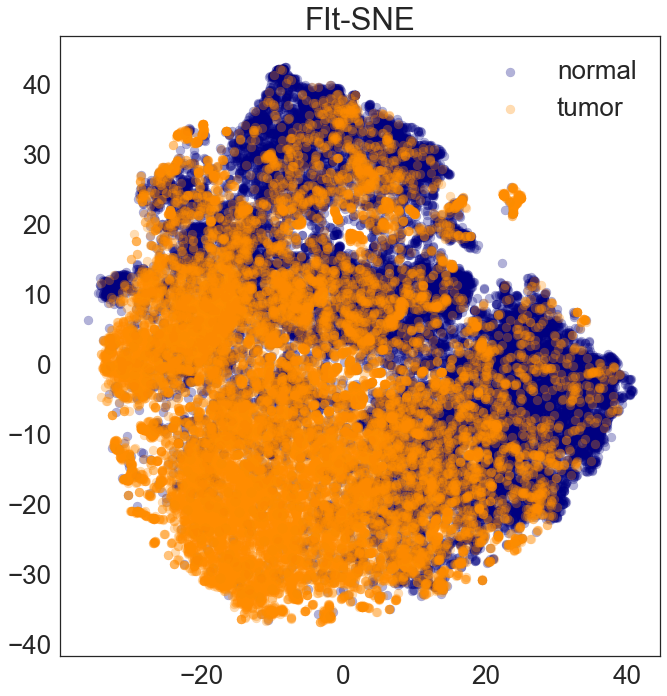

In [46]:
fig = plt.figure(figsize=(10, 10))
sns.set_style('white')
sns.set_context('talk', font_scale=2)
colors = ['navy', 'darkorange']
lw = 0.2
label_matrix = ['normal', 'tumor']


for color, i, target_name in zip(colors, [0, 1], label_matrix):
    plt.scatter(Y[labels == i, 0], Y[labels == i, 1], color=color, alpha=.3, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)

fig.tight_layout()
plt.title('FIt-SNE')
plt.savefig('presentation_images/pixelplot_vector_fitsne.pdf')

In [39]:
embedding = umap.UMAP(n_neighbors=20,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

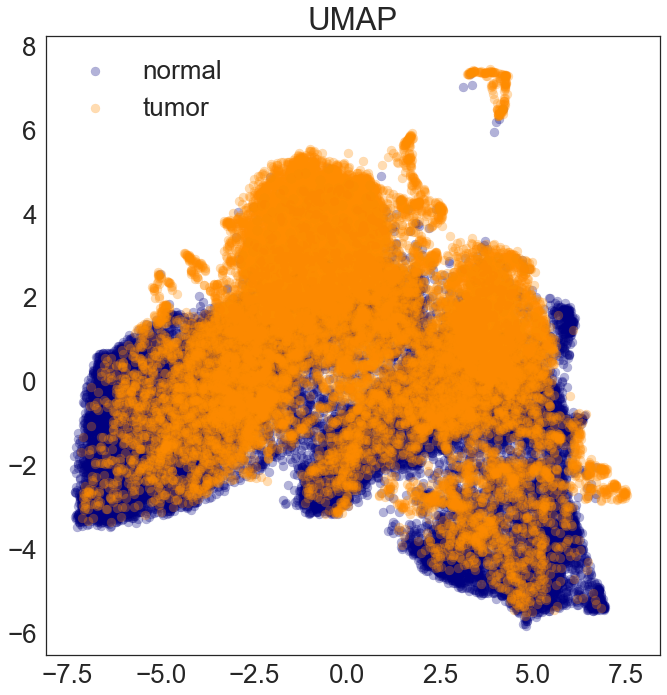

In [49]:
fig = plt.figure(figsize=(10, 10))

colors = ['navy', 'darkorange']
lw = 0.2
label_matrix = ['normal', 'tumor']


for color, i, target_name in zip(colors, [0, 1], label_matrix):
    plt.scatter(embedding[labels == i, 0], embedding[labels == i, 1], color=color, alpha=.3, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)

fig.tight_layout()
plt.title('UMAP')
plt.savefig('presentation_images/pixelplot_vector_umap.pdf')